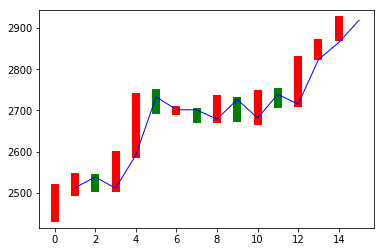

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
date = np.linspace(1,15,15)
endPrice = np.array([2511.90,2538.26,2510.68,2591.66,2732.98,2701.69,2701.29,2678.67,2726.50,2681.50,2739.17,2715.07,2823.58,2864.90,2919.08])
beginPrice = np.array([2438.71,2500.88,2534.95,2512.52,2594.04,2743.26,2697.47,2695.24,2678.23,2722.13,2674.93,2744.13,2717.46,2832.73,2877.40])
plt.figure()
for i in range(0,15):
    # 柱状图
    dateOne = np.zeros([2])
    dateOne[0] = i;
    dateOne[1] = i;
    priceOne = np.zeros([2])
    priceOne[0] = beginPrice[i]
    priceOne[1] = endPrice[i]
    if endPrice[i] > beginPrice[i]:
        plt.plot(dateOne, priceOne, 'r', lw=8) # 收盘价大，红
    else:
        plt.plot(dateOne, priceOne, 'g', lw=8)

'''
A(15×1)*w1（1×10） + b1（1×10） = B(15×10)
B(15×10)*w2（10×1） + b2(15×1) = C(15×1）
A 输入层  B 中间层  C 输出层
'''
# 输入层
dateNormal = np.zeros([15,1])
priceNormal = np.zeros([15,1])
for i in range(0,15):
    dateNormal[i,0] = i/14.0  # max=>14
    priceNormal[i,0] = endPrice[i]/3000.0 #max=>3000
x = tf.placeholder(tf.float32, [None, 1]) # N行1列
y = tf.placeholder(tf.float32, [None, 1])

# 中间层（训练）
w1 = tf.Variable(tf.random_uniform([1, 10],0,1)) #  1行10列， >0  <1
b1 = tf.Variable(tf.zeros([1,10]))
B = tf.matmul(x, w1) + b1 # B
layer1 = tf.nn.relu(B) # 激励函数(映射wb1)

# 输出层（将训练出的w1,w2,b1,b2使用新的输入数据验证、预测）
w2 = tf.Variable(tf.random_uniform([10, 1],0,1))
b2 = tf.Variable(tf.zeros([15,1]))
C = tf.matmul(layer1, w2) + b2
layer2 = tf.nn.relu(C)
loss = tf.reduce_mean(tf.square(y-layer2))  #reduce_mean 求平均值  y=>真实数值  layer2=>预测数值
# train_step 每次调整步长  梯度下降法，每次调整0.1  minimize:目的是减小loss
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # 开始训练
    for i in range(0, 10000):
        sess.run(train_step, feed_dict={x:dateNormal, y:priceNormal})
    # 训练结束得出 w1,w2 b1,b2
    
    # 检测w1,w2 b1,b2有效性 =>（new A,B,w1,w2,b1,b2) => predict    
    predict = sess.run(layer2, feed_dict={x:dateNormal}) # 预测结果
#     print(predict)
    predPrice = np.zeros([15,1])   # 预测收盘价格
    for i in range(0,15):
        predPrice[i,0] = (predict*3000)[i,0]
    plt.plot(date,predPrice, 'b', lw=1)
plt.show()